ノック１

In [84]:
import pandas as pd
customer_master = pd.read_csv('customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [85]:
item_master = pd.read_csv('item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [86]:
transaction_1 = pd.read_csv('transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [87]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


ノック２

In [88]:
transaction_2 = pd.read_csv('transaction_2.csv')
transaction = pd.concat([transaction_1,transaction_2], ignore_index=True) #concat:縦結合/ignore_index：インデックスを無視する、再配置
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [89]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [90]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1,transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [91]:
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


ノック３

In [92]:
join_data = pd.merge(transaction_detail,transaction[["transaction_id","payment_date","customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [93]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


ノック４

In [94]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


ノック５

In [95]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price", "price"]]

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000
...,...,...,...
7139,1,180000,180000
7140,1,85000,85000
7141,2,50000,100000
7142,1,85000,85000


ノック６

In [96]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [97]:
join_data["price"].sum() == transaction["price"].sum()

True

ノック７

In [98]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [99]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [100]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


ノック８

In [101]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [102]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y/%m")
join_data[["payment_date", "payment_month"]]

,payment_date,payment_month
0,2019-02-01 01:36:57,2019/02
1,2019-02-01 01:37:23,2019/02
2,2019-02-01 02:34:19,2019/02
3,2019-02-01 02:47:23,2019/02
4,2019-02-01 04:33:46,2019/02
...,...,...
7139,2019-07-31 21:20:44,2019/07
7140,2019-07-31 21:52:48,2019/07
7141,2019-07-31 23:35:25,2019/07
7142,2019-07-31 23:39:35,2019/07


In [103]:
join_data.groupby("payment_month").sum()["price"]

payment_month
2019/02    160185000
2019/03    160370000
2019/04    160510000
2019/05    155420000
2019/06    164030000
2019/07    170620000
Name: price, dtype: int64

ノック９

In [104]:
join_data.groupby(["payment_month", "item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
2019/02       PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
2019/03       PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
2019/04       PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
2019/05       PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
2019/06       PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
2019/07       PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [105]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                      ... quantity                
payment_month   2019/02   2019/03   2019/04  ...  2019/05 2019/06 2019/07
item_name                                    ...                         
PC-A           24150000  26000000  25900000  ...      497     520     505
PC-B           25245000  25500000  23460000  ...      298     282     332
PC-C           19800000  19080000  21960000  ...      171     182     162
PC-D           31140000  25740000  24300000  ...      144     160     145
PC-E           59850000  64050000  64890000  ...      280     302     341

[5 rows x 12 columns]

ノック１０

In [106]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019/02,24150000,25245000,19800000,31140000,59850000
2019/03,26000000,25500000,19080000,25740000,64050000
2019/04,25900000,23460000,21960000,24300000,64890000
2019/05,24850000,25330000,20520000,25920000,58800000
2019/06,26000000,23970000,21840000,28800000,63420000
2019/07,25250000,28220000,19440000,26100000,71610000


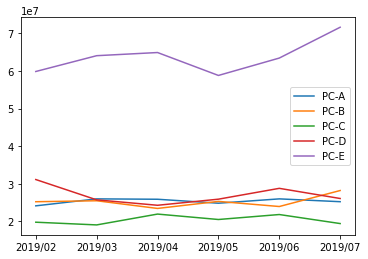

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()

In [110]:
list(graph_data.index)

['2019/02', '2019/03', '2019/04', '2019/05', '2019/06', '2019/07']

In [111]:
graph_data["PC-A"]

payment_month
2019/02    24150000
2019/03    26000000
2019/04    25900000
2019/05    24850000
2019/06    26000000
2019/07    25250000
Name: PC-A, dtype: int64

In [112]:
graph_data

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
2019/02,24150000,25245000,19800000,31140000,59850000
2019/03,26000000,25500000,19080000,25740000,64050000
2019/04,25900000,23460000,21960000,24300000,64890000
2019/05,24850000,25330000,20520000,25920000,58800000
2019/06,26000000,23970000,21840000,28800000,63420000
2019/07,25250000,28220000,19440000,26100000,71610000
